In [19]:
from core import * 
import json

In [20]:
filtered_all_recipes = read_all_recipes("../filtered_dataset")

In [21]:
with open("../whitelist.json", 'r') as file:
    white_list = json.loads(file.read())

In [22]:
white_list = set(white_list.keys())

In [23]:
len(white_list)

461

In [36]:
filtered_recipe_list_white_list = []
for recipe in filtered_all_recipes:
    ingr_set = set(recipe["ingredients"])
    new_recipe = {k: v for k, v in recipe.items()}
    new_recipe["ingredients"] = list(ingr_set.intersection(white_list))
    filtered_recipe_list_white_list.append(new_recipe)

In [37]:
index = 0
for recipe in filtered_recipe_list_white_list:
    with open("../filtered_dataset_with_white_list/" + str(index) + ".json", "w") as file:
        file.write(json.dumps(recipe))
    index += 1
print(index)

18624


In [38]:
words_hist = dict()
for recipe in filtered_recipe_list_white_list:
    ingr_list = recipe["ingredients"]
    ingr_dict = {}
    for ingr in ingr_list:
        if ingr not in ingr_dict:
            ingr_dict[ingr] = 1
        else:
            ingr_dict[ingr] += 1
    for ingr, count in ingr_dict.items():
        if ingr not in words_hist:
            words_hist[ingr] = count
        else:
            words_hist[ingr] += count


In [39]:
words_hist_list = sorted(words_hist.items(), key=lambda kv: kv[1])

In [40]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [41]:
print(len(words_hist_list))

325


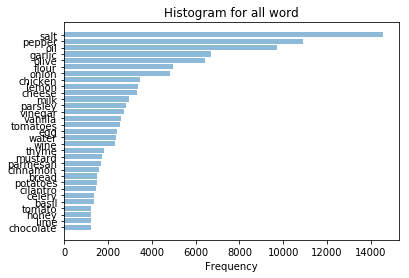

In [46]:
objects = []
performance = []

for element in words_hist_list:
    if element[1] > 1200:
        objects.append(element[0])
        performance.append(element[1])

y_pos = np.arange(len(objects))

 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Frequency')
plt.title('Histogram for all word')

plt.show()